In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(centers=2,random_state=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
y_train.reshape(-1,1).shape

(67, 1)

In [55]:
class CustomLogisticModel:
    def __init__(self,lr=0.01,iters=20):
        self.__lr = lr
        self.__iters = iters
    
    def fit(self,X,y):
        self.__y = y.reshape(-1,1)
        X_mod = np.hstack([np.ones([len(X),1]),X])
        self.__X = X_mod
        self.__theta = np.zeros([X_mod.shape[1],1])
        error = []
        for x in range(self.__iters):
            error.append(self.error())
            self.gradient_ascend()
        
        self.theta_ = self.__theta
        return error
    
    def gradient_ascend(self):
        theta = self.gradient()
        self.__theta += theta
    
    def gradient(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        diff = ya - yh
        return np.dot(self.__X.T,diff)* self.__lr
        
    def hypothesis(self,X):
        prod = np.dot(X,self.__theta)
        return 1 /(1 + np.exp(-prod))
    
    def predict(self,X):
        X_mod = np.hstack([np.ones([len(X),1]),X])
        yh = self.hypothesis(X_mod)
        return (yh > .5).astype(int).flatten()
    
    def error(self):
        yh = self.hypothesis(self.__X)
        ya = self.__y
        ll = ya * np.log(yh) + (1-ya)*np.log(1-yh)
        return -np.mean(ll)
    
    def score(self,X,y):
        yp = self.predict(X)
        mean = np.mean(yp==y)
        return f'{(1 - mean)*100} %'
        

In [56]:
model = CustomLogisticModel()


In [57]:
error = model.fit(X_train,y_train)

In [58]:
model.theta_ 

array([[ 0.71194608],
       [ 1.17525229],
       [-1.1967875 ]])

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
skmod = LogisticRegression()

In [61]:
skmod.fit(X_train,y_train)

LogisticRegression()

In [62]:
skmod.coef_

array([[ 0.44885782, -2.2541499 ]])

In [63]:
skmod.intercept_

array([5.05641484])

In [64]:
th = model.theta_.flatten()
x_sam = np.linspace(-6,7)

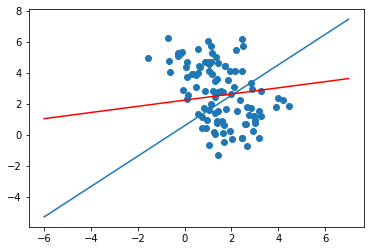

In [65]:
plt.scatter(X[:,0],X[:,1])
y_sam = - th[1] / th[2] * x_sam - th[0] / th[2]
y_samsk = - skmod.coef_[0][0] / skmod.coef_[0][1] *x_sam - skmod.intercept_[0]/skmod.coef_[0][1]
plt.plot(x_sam,y_sam)
plt.plot(x_sam ,y_samsk,'r')

In [66]:
model.score(X_train,y_train)

'11.940298507462687 %'

In [67]:
skmod.score(X_train,y_train)

0.9552238805970149